In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm that is principally different from methods like K-means or hierarchical clustering. DBSCAN is particularly effective for datasets that contain clusters of similar density. Let's go over the key concepts and how DBSCAN works:

Key Concepts of DBSCAN
Density-based Clustering: Unlike centroid-based algorithms like K-means, DBSCAN groups points that are closely packed together, marking as outliers the points that lie alone in low-density regions.

Two Main Parameters:

Epsilon (ε): Specifies how close points should be to each other to be considered a part of a cluster. It defines the radius around a data point to search for neighboring points.

Minimum Points (MinPts): The minimum number of points required to form a dense region, which implies a cluster.

Point Types:

Core Point: A point that has at least MinPts within its ε radius.
Border Point: A point that has fewer than MinPts within its ε radius, but is in the neighborhood of a core point.
Noise Point: A point that is neither a core point nor a border point.
How DBSCAN Works
Random Start: The algorithm starts with an arbitrary point that has not been visited and its neighborhood information is retrieved from the ε radius.

Cluster Formation:

If the point is a core point, a cluster is started, and all points within its ε radius are part of the cluster.

This process is recursively continued, meaning that for each new point within the cluster, its ε neighborhood is also added to the cluster.
This recursive process results in a maximal set of density-connected points (forming a cluster).

Handling Border Points: Border points are included in the clusters of their respective core points but do not expand the cluster themselves.

Marking Noise: Every point not reachable from any other point is marked as noise.

Iterative Process: The process is continued until all points are either part of a cluster or marked as noise.

Advantages of DBSCAN

Does Not Require Specifying Number of Clusters: Unlike K-means, DBSCAN automatically determines the number of clusters based on the data.
Handles Noise Well: It is robust to outliers and can identify them as noise.
Capable of Finding Arbitrarily Shaped Clusters: It can find clusters of any shape, unlike K-means which is biased towards spherical clusters.

Limitations

Parameter Sensitivity: Choosing appropriate ε and MinPts can be challenging and data-dependent.

Difficulty with Varying Densities: Struggles with datasets where the clusters have varying densities.

Use Cases

DBSCAN is widely used in applications such as anomaly detection, spatial data analysis, and image segmentation.

In [ ]:
!pip install pycaret
from pycaret.clustering import *

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Data_Mining_CMPE_255/Sample_Stocks.csv')

In [9]:
data.head()

,returns,dividendyield
0,-19,0.0
1,-13,0.0
2,-14,0.0
3,-9,0.0
4,-19,0.0


In [11]:
cluster_setup = setup(data, session_id=123, normalize=True)
dbscan_model = create_model('dbscan')
dbscan_results = assign_model(dbscan_model)

,Description,Value
0,Session id,123
1,Original data shape,"(648, 2)"
2,Transformed data shape,"(648, 2)"
3,Numeric features,2
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7040,2697.4411,1.6290,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

The Silhouette Score of 0.7040 and the Calinski-Harabasz Index of 2697.4411 both suggest a strong clustering performance, indicating well-separated and coherent clusters. The Silhouette Score implies good cluster separation and coherence, while the high Calinski-Harabasz Index points to dense clusters that are well-differentiated. However, the Davies-Bouldin Index of 1.6290, though not poor, indicates only moderate cluster separation. On the other hand, the Homogeneity, Rand Index, and Completeness scores are all 0, revealing a complete lack of homogeneity, randomness in cluster assignments compared to true labels, and a failure to group all members of a given class into the same cluster. These latter scores suggest that, despite apparent cluster separation and internal cohesion, the clusters do not align with any pre-defined or expected grouping in the data.

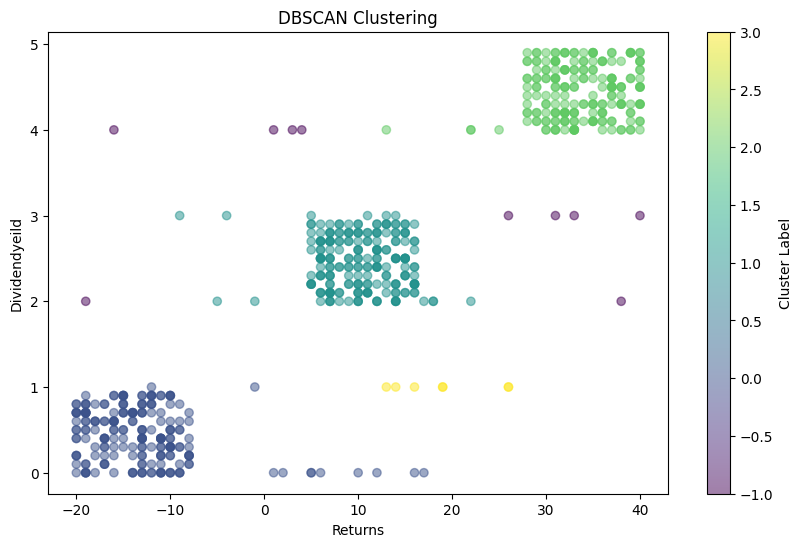

In [18]:
import matplotlib.pyplot as plt

dbscan_results['Cluster_Label'] = dbscan_results['Cluster'].apply(lambda x: int(x.split(' ')[1]))

plt.figure(figsize=(10, 6))
plt.scatter(dbscan_results['returns'], dbscan_results['dividendyield'],
            c=dbscan_results['Cluster_Label'], cmap='viridis', alpha=0.5)

plt.title('DBSCAN Clustering')
plt.xlabel('Returns')
plt.ylabel('Dividendyeild')
plt.colorbar(label='Cluster Label')
plt.show()